In [57]:
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona

In [81]:
crs

{'init': 'epsg:4326'}

In [82]:
fl = '../gis_data/wbd10u_outline.shp'
huc10U = gpd.read_file(fl)
old_crs = huc10U.crs

fl = '../gis_data/wbd10l_outline.shp'
huc10L = gpd.read_file(fl)

fl = '../gis_data/wbdhu2_a_us_september2017.gdb'
geom = gpd.read_file(fl)
crs = geom.crs

In [83]:
old_crs

{'init': 'epsg:4269'}

In [28]:
# reporject the huc10s
huc10L = huc10L.to_crs(geom.crs)
huc10U = huc10U.to_crs(geom.crs)

In [33]:
geom = geom.loc[geom.HUC2 != '10']
newGeom = geom[['HUC2','geometry']]

In [34]:
newGeom = newGeom.set_geometry('geometry')
newGeom.crs = crs

In [37]:
huc10L['HUC2'] = '10L'
huc10U['HUC2'] = '10U'

huc10L = huc10L[['HUC2','geometry']]
huc10U = huc10U[['HUC2','geometry']]

huc10L.set_geometry('geometry')
huc10U.set_geometry('geometry')

huc10L.crs = crs
huc10U.crs = crs

In [48]:
wbd = newGeom.append(huc10L)

In [49]:
wbd = wbd.append(huc10U)

In [78]:
wbd.to_file('../gis_data/huc2_boundaries.geojson', driver = 'GeoJSON')

In [79]:
wbd = gpd.read_file('../gis_data/huc2_boundaries.geojson')

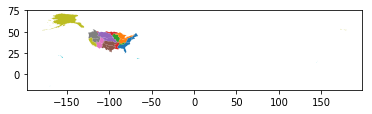

In [80]:
wbd.plot(column = 'HUC2')